In [65]:
import xgboost as xgb
import pandas as pd
import numpy as np
import catboost as cb
import shap
import matplotlib.pyplot as plt; plt.style.use('seaborn')

In [66]:
data = pd.read_csv('1.csv')
cols = data.columns[1:730]

In [67]:
data[cols]

,nAcid,ALogP,ALogp2,AMR,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,...,MW,WTPT-1,WTPT-2,WTPT-3,WTPT-4,WTPT-5,WPATH,WPOL,XLogP,Zagreb
0,0,-0.2860,0.081796,126.1188,74.170169,12,12,64,31,33,...,439.218115,64.771680,2.089409,15.471445,8.858910,3.406628,3011,47,4.666,166
1,0,-0.8620,0.743044,131.9420,80.357341,12,12,70,33,37,...,467.249415,68.960024,2.089698,15.486947,8.863774,3.406648,3516,54,5.804,174
2,0,0.7296,0.532316,139.9304,74.064997,18,18,62,33,29,...,463.181729,68.748923,2.083301,18.011114,11.390412,3.406644,3542,52,2.964,176
3,0,-0.3184,0.101379,133.4822,80.357341,12,12,70,33,37,...,467.249415,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,6.015,174
4,0,1.3551,1.836296,143.1903,76.356583,18,18,64,33,31,...,461.202465,68.883696,2.087385,15.468365,8.857943,3.406624,3594,50,4.462,174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0,1.8193,3.309852,177.6817,89.159790,24,24,73,43,30,...,598.166139,88.709996,2.063023,25.470481,21.946991,0.000000,7121,70,2.526,236
1970,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,...,570.134839,84.662088,2.064929,24.928962,21.405589,0.000000,6171,66,1.884,228
1971,0,1.6903,2.857114,167.6057,82.972618,24,24,67,41,26,...,570.134839,84.660642,2.064894,24.923083,21.400883,0.000000,6421,66,1.884,228
1972,0,1.3365,1.786232,125.5605,63.287860,18,18,51,31,20,...,436.098059,64.171346,2.070043,19.841924,16.326873,0.000000,2583,50,0.782,174


In [68]:
len(data['pIC50'].values)

1974

In [69]:
model = cb.CatBoostRegressor(iterations=1000, depth=4, learning_rate=0.05, loss_function='RMSE',
                              logging_level='Verbose')

In [70]:
model.fit(data[cols],data['pIC50'].values)

0:	learn: 1.3890533	total: 6.17ms	remaining: 6.17s
1:	learn: 1.3600427	total: 11.1ms	remaining: 5.52s
2:	learn: 1.3297879	total: 15.7ms	remaining: 5.22s
3:	learn: 1.3028572	total: 20.8ms	remaining: 5.19s
4:	learn: 1.2766478	total: 25.8ms	remaining: 5.13s
5:	learn: 1.2550476	total: 30.7ms	remaining: 5.08s
6:	learn: 1.2318502	total: 35.6ms	remaining: 5.05s
7:	learn: 1.2091653	total: 40.7ms	remaining: 5.04s
8:	learn: 1.1886680	total: 45.8ms	remaining: 5.04s
9:	learn: 1.1666472	total: 50.7ms	remaining: 5.01s
10:	learn: 1.1492008	total: 56ms	remaining: 5.04s
11:	learn: 1.1291836	total: 60.9ms	remaining: 5.01s
12:	learn: 1.1117726	total: 65.6ms	remaining: 4.98s
13:	learn: 1.0964096	total: 70.3ms	remaining: 4.95s
14:	learn: 1.0809150	total: 75.2ms	remaining: 4.94s
15:	learn: 1.0660958	total: 80.3ms	remaining: 4.94s
16:	learn: 1.0536413	total: 85.3ms	remaining: 4.93s
17:	learn: 1.0417707	total: 90.4ms	remaining: 4.93s
18:	learn: 1.0306442	total: 96.8ms	remaining: 5s
19:	learn: 1.0195110	total:

172:	learn: 0.6615501	total: 878ms	remaining: 4.2s
173:	learn: 0.6609521	total: 884ms	remaining: 4.19s
174:	learn: 0.6604827	total: 888ms	remaining: 4.19s
175:	learn: 0.6596836	total: 894ms	remaining: 4.18s
176:	learn: 0.6591793	total: 900ms	remaining: 4.18s
177:	learn: 0.6580572	total: 906ms	remaining: 4.18s
178:	learn: 0.6577903	total: 912ms	remaining: 4.18s
179:	learn: 0.6567946	total: 917ms	remaining: 4.18s
180:	learn: 0.6564283	total: 922ms	remaining: 4.17s
181:	learn: 0.6561930	total: 927ms	remaining: 4.17s
182:	learn: 0.6554930	total: 932ms	remaining: 4.16s
183:	learn: 0.6545500	total: 937ms	remaining: 4.15s
184:	learn: 0.6543576	total: 941ms	remaining: 4.15s
185:	learn: 0.6531797	total: 946ms	remaining: 4.14s
186:	learn: 0.6523227	total: 951ms	remaining: 4.13s
187:	learn: 0.6514032	total: 956ms	remaining: 4.13s
188:	learn: 0.6512737	total: 960ms	remaining: 4.12s
189:	learn: 0.6504286	total: 965ms	remaining: 4.11s
190:	learn: 0.6502718	total: 970ms	remaining: 4.11s
191:	learn: 0

348:	learn: 0.5538858	total: 1.75s	remaining: 3.27s
349:	learn: 0.5533502	total: 1.76s	remaining: 3.27s
350:	learn: 0.5532866	total: 1.76s	remaining: 3.26s
351:	learn: 0.5532243	total: 1.77s	remaining: 3.26s
352:	learn: 0.5531220	total: 1.77s	remaining: 3.25s
353:	learn: 0.5527534	total: 1.78s	remaining: 3.25s
354:	learn: 0.5521411	total: 1.78s	remaining: 3.24s
355:	learn: 0.5515699	total: 1.79s	remaining: 3.23s
356:	learn: 0.5511239	total: 1.79s	remaining: 3.23s
357:	learn: 0.5510672	total: 1.8s	remaining: 3.22s
358:	learn: 0.5505184	total: 1.8s	remaining: 3.22s
359:	learn: 0.5499168	total: 1.81s	remaining: 3.21s
360:	learn: 0.5493537	total: 1.81s	remaining: 3.21s
361:	learn: 0.5490334	total: 1.82s	remaining: 3.2s
362:	learn: 0.5485833	total: 1.82s	remaining: 3.2s
363:	learn: 0.5481832	total: 1.83s	remaining: 3.19s
364:	learn: 0.5479545	total: 1.83s	remaining: 3.19s
365:	learn: 0.5473900	total: 1.84s	remaining: 3.18s
366:	learn: 0.5465995	total: 1.84s	remaining: 3.17s
367:	learn: 0.54

523:	learn: 0.4880040	total: 2.62s	remaining: 2.38s
524:	learn: 0.4877930	total: 2.63s	remaining: 2.38s
525:	learn: 0.4874590	total: 2.63s	remaining: 2.37s
526:	learn: 0.4871871	total: 2.64s	remaining: 2.37s
527:	learn: 0.4870660	total: 2.64s	remaining: 2.36s
528:	learn: 0.4862980	total: 2.65s	remaining: 2.36s
529:	learn: 0.4859646	total: 2.65s	remaining: 2.35s
530:	learn: 0.4858860	total: 2.66s	remaining: 2.35s
531:	learn: 0.4852540	total: 2.66s	remaining: 2.34s
532:	learn: 0.4850278	total: 2.67s	remaining: 2.34s
533:	learn: 0.4848054	total: 2.67s	remaining: 2.33s
534:	learn: 0.4844996	total: 2.68s	remaining: 2.33s
535:	learn: 0.4844594	total: 2.68s	remaining: 2.32s
536:	learn: 0.4841363	total: 2.69s	remaining: 2.32s
537:	learn: 0.4837537	total: 2.69s	remaining: 2.31s
538:	learn: 0.4837130	total: 2.7s	remaining: 2.31s
539:	learn: 0.4833185	total: 2.7s	remaining: 2.3s
540:	learn: 0.4829994	total: 2.71s	remaining: 2.3s
541:	learn: 0.4823443	total: 2.71s	remaining: 2.29s
542:	learn: 0.48

698:	learn: 0.4362555	total: 3.5s	remaining: 1.51s
699:	learn: 0.4358224	total: 3.5s	remaining: 1.5s
700:	learn: 0.4352931	total: 3.51s	remaining: 1.5s
701:	learn: 0.4350112	total: 3.51s	remaining: 1.49s
702:	learn: 0.4347236	total: 3.52s	remaining: 1.49s
703:	learn: 0.4346306	total: 3.52s	remaining: 1.48s
704:	learn: 0.4343655	total: 3.53s	remaining: 1.48s
705:	learn: 0.4341443	total: 3.53s	remaining: 1.47s
706:	learn: 0.4338332	total: 3.54s	remaining: 1.47s
707:	learn: 0.4335438	total: 3.54s	remaining: 1.46s
708:	learn: 0.4332689	total: 3.55s	remaining: 1.46s
709:	learn: 0.4329461	total: 3.55s	remaining: 1.45s
710:	learn: 0.4327369	total: 3.56s	remaining: 1.45s
711:	learn: 0.4326913	total: 3.56s	remaining: 1.44s
712:	learn: 0.4323811	total: 3.57s	remaining: 1.44s
713:	learn: 0.4319519	total: 3.57s	remaining: 1.43s
714:	learn: 0.4315814	total: 3.58s	remaining: 1.43s
715:	learn: 0.4313481	total: 3.58s	remaining: 1.42s
716:	learn: 0.4311039	total: 3.59s	remaining: 1.42s
717:	learn: 0.43

875:	learn: 0.3953035	total: 4.37s	remaining: 619ms
876:	learn: 0.3951960	total: 4.38s	remaining: 614ms
877:	learn: 0.3948662	total: 4.38s	remaining: 609ms
878:	learn: 0.3947417	total: 4.39s	remaining: 604ms
879:	learn: 0.3946164	total: 4.39s	remaining: 599ms
880:	learn: 0.3944699	total: 4.4s	remaining: 594ms
881:	learn: 0.3943437	total: 4.4s	remaining: 589ms
882:	learn: 0.3940771	total: 4.41s	remaining: 584ms
883:	learn: 0.3938830	total: 4.42s	remaining: 579ms
884:	learn: 0.3938091	total: 4.42s	remaining: 574ms
885:	learn: 0.3937081	total: 4.42s	remaining: 569ms
886:	learn: 0.3935030	total: 4.43s	remaining: 564ms
887:	learn: 0.3932764	total: 4.43s	remaining: 559ms
888:	learn: 0.3932441	total: 4.44s	remaining: 554ms
889:	learn: 0.3930046	total: 4.45s	remaining: 550ms
890:	learn: 0.3928668	total: 4.45s	remaining: 545ms
891:	learn: 0.3924707	total: 4.46s	remaining: 540ms
892:	learn: 0.3923580	total: 4.46s	remaining: 535ms
893:	learn: 0.3921709	total: 4.47s	remaining: 530ms
894:	learn: 0.

In [71]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(data[cols])
print(shap_values.shape)

(1974, 729)


In [74]:
qq = pd.read_csv('top20_norm.csv')
qq.columns

Index(['LipoaffinityIndex', 'C1SP2', 'MDEC-23', 'MLFER_A', 'nC', 'C3SP2',
       'minHsOH', 'BCUTp-1h', 'nHBAcc', 'BCUTw-1h', 'maxssO', 'maxsssN',
       'minHBint10', 'SHsOH', 'VCH-5', 'mindO', 'maxHsOH', 'SsOH', 'nHsOH',
       'minsOH'],
      dtype='object')

In [89]:
import os 
os.getcwd()

'C:\\Users\\祖龙龙'

In [87]:
pd.read_csv('pIC50_shap.csv')

,LipoaffinityIndex,C1SP2,MDEC-23,MLFER_A,nC,C3SP2,minHsOH,BCUTp-1h,nHBAcc,BCUTw-1h,maxssO,maxsssN,minHBint10,SHsOH,VCH-5,mindO,maxHsOH,SsOH,nHsOH,minsOH
0,0.132199,0.144218,0.025360,-0.053003,0.100833,-0.054074,0.048008,0.052631,0.075443,0.043357,0.090687,0.063329,-0.023417,0.025262,0.099470,0.035204,0.001641,0.018584,-0.005398,0.018173
1,0.120033,0.136683,0.093165,-0.037260,0.100733,-0.050484,0.042560,0.055895,0.084117,0.043268,0.095725,0.055271,-0.023181,-0.020279,-0.039136,0.033276,-0.000057,0.020370,-0.000798,0.018743
2,0.133803,0.136622,0.094856,0.072732,0.107907,-0.042254,0.045348,0.064227,0.075775,0.038730,0.181761,0.055916,0.075250,0.034856,-0.038435,0.034195,0.015687,0.018609,0.025339,0.020187
3,0.119317,0.140527,0.093165,-0.044873,0.100733,-0.049060,0.048048,0.052610,0.084117,0.043357,0.101039,0.053981,-0.023181,0.025262,-0.041504,0.035253,-0.000057,0.020370,-0.005398,0.018630
4,0.121839,0.140527,0.093143,-0.053459,0.100833,-0.048694,0.044690,0.052685,0.086308,0.038055,0.083756,0.055745,-0.022314,0.025223,-0.040970,0.035917,-0.005934,0.023576,-0.005398,0.018752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1969,0.103700,0.096929,0.193701,0.093079,0.092608,0.053744,0.051723,0.063968,-0.039738,0.053063,-0.019364,-0.039364,-0.034562,0.031651,0.041990,-0.059660,0.018361,0.025569,0.020553,0.026951
1970,-0.074372,0.068742,0.178086,-0.039460,0.091761,0.053744,0.056955,0.067646,-0.034036,0.055802,-0.022069,-0.032620,-0.034763,0.032335,0.030243,-0.071649,0.031751,-0.197053,0.020553,0.029392
1971,-0.072945,0.068742,0.219609,0.004789,0.094439,0.053744,0.056986,0.067646,-0.034036,0.057535,-0.022069,-0.032620,-0.035659,0.032335,0.030243,-0.073468,0.031751,-0.154613,0.020553,0.035439
1972,-0.141512,0.080288,0.074354,0.080848,-0.082136,0.058239,0.047362,0.073445,-0.039631,0.051351,-0.022151,-0.035593,-0.030467,0.034848,0.034024,-0.039479,0.031328,0.029371,0.020553,0.040147


In [86]:
pd.DataFrame(shap_values,columns = cols).loc[:,list(qq.columns)].to_csv("pIC50_shap.csv",index = False,header = True)

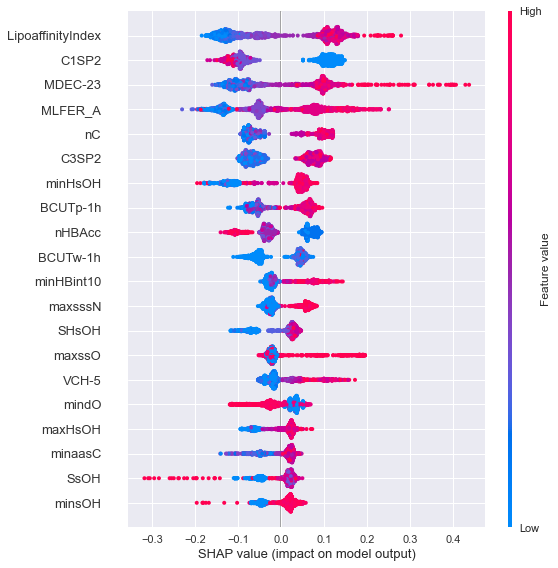

In [72]:
#下图中每一行代表一个特征，横坐标为SHAP值。一个点代表一个样本，颜色越红说明特征本身数值越大，颜色越蓝说明特征本身数值越小。
shap.summary_plot(shap_values, data[cols],layered_violin_max_num_bins=30)

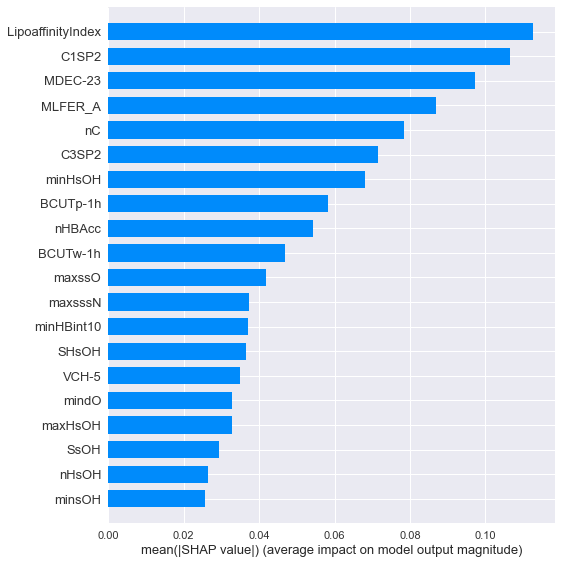

In [9]:
#我们也可以把一个特征对目标变量影响程度的绝对值的均值作为这个特征的重要性。
#因为SHAP和feature_importance的计算方法不同，所以我们这里也得到了与第1节不同的重要性排序。
shap.summary_plot(shap_values, data[cols], plot_type="bar")

In [10]:
print(shap_values)

[[-1.66453733e-05 -1.73227559e-02 -7.55796311e-03 ...  7.13079336e-04
   2.22214355e-02  3.60571272e-03]
 [-1.66453733e-05 -1.73227559e-02 -4.50227355e-03 ...  7.13079336e-04
   1.78341430e-02  3.60571272e-03]
 [-1.66453733e-05 -1.73227559e-02 -1.25720786e-02 ...  7.13079336e-04
   1.29464796e-02  3.60571272e-03]
 ...
 [-1.66453733e-05  4.09136222e-03  1.45914846e-02 ...  4.06513542e-04
  -3.99337888e-03  4.32405655e-03]
 [-1.66453733e-05  1.22326249e-02  1.54650717e-02 ...  4.06513542e-04
  -5.52701070e-02  4.80508930e-03]
 [-1.66453733e-05  1.13971806e-02  1.62389067e-02 ...  4.06513542e-04
   8.34992068e-03  4.80508930e-03]]


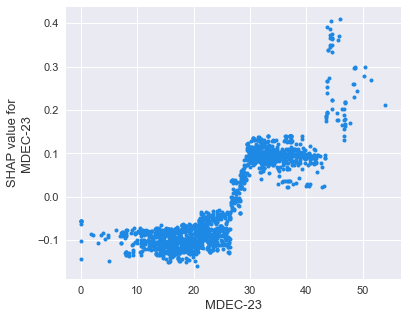

In [11]:
#SHAP也提供了部分依赖图的功能，与传统的部分依赖图不同的是，这里纵坐标不是目标变量y的数值而是SHAP值。
shap.dependence_plot('MDEC-23', shap_values, data[cols], interaction_index=None, show=False)

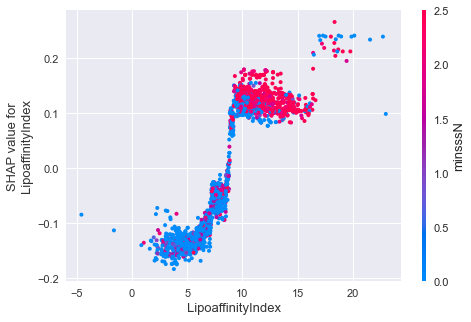

In [40]:
#我们也可以用dependence_plot描绘两个变量交互下变量对目标值的影响。
shap.dependence_plot('LipoaffinityIndex', shap_values, data[cols], interaction_index='minsssN', show=False)

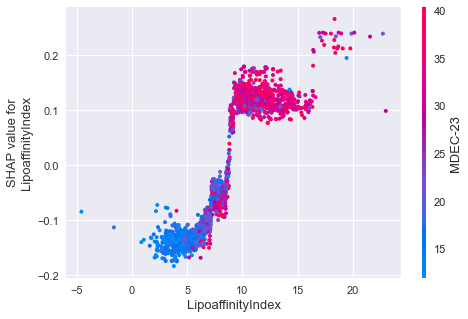

In [13]:
#我们也可以用dependence_plot描绘两个变量交互下变量对目标值的影响。
shap.dependence_plot('LipoaffinityIndex', shap_values, data[cols], interaction_index='MDEC-23', show=False)

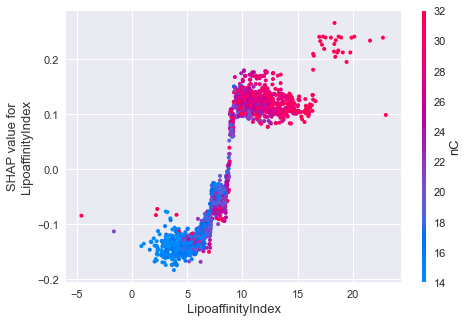

In [35]:
#我们也可以用dependence_plot描绘两个变量交互下变量对目标值的影响。
shap.dependence_plot('LipoaffinityIndex', shap_values, data[cols], interaction_index='nC', show=False)

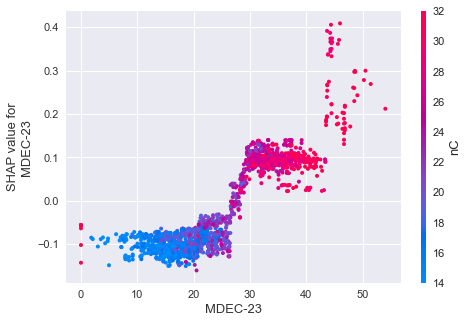

In [37]:
#我们也可以用dependence_plot描绘两个变量交互下变量对目标值的影响。
shap.dependence_plot('MDEC-23', shap_values, data[cols], interaction_index='nC', show=False)

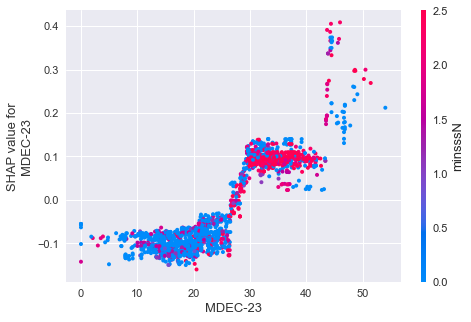

In [56]:
#我们也可以用dependence_plot描绘两个变量交互下变量对目标值的影响。
shap.dependence_plot('MDEC-23', shap_values, data[cols], interaction_index='minsssN', show=False)